All imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import redshift_connector
import seaborn as sns
import os
from datetime import datetime
import random

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM


In [2]:
random_number = random.randint(1, 1000)

# Get the current date and time
now = datetime.now()
formatted_now = now.strftime("%Y_%m_%d_%H_%M_%S")
print("Random Number:", random_number)
print("Formatted date and time:", formatted_now)
# Specify the directory path where you want to save the CSV file
directory = f'IncludingFailed_Dirves_Normalization_{formatted_now}_{random_number}'

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

print("Directory: ", directory)


Random Number: 233
Formatted date and time: 2024_04_10_19_48_58
Directory:  IncludingFailed_Dirves_Normalization_2024_04_10_19_48_58_233


Read Input Data from CSVs

In [3]:
df_data_with_max_poh = pd.DataFrame()

temp_df = pd.read_csv("df_data_with_max_poh_failed_drives.csv")
temp_df['Failed_Drive']='YES'
df_data_with_max_poh = pd.concat([df_data_with_max_poh, temp_df])

temp_df = pd.read_csv("df_data_with_max_poh_april_2021.csv")
temp_df['Failed_Drive']='NO'
df_data_with_max_poh = pd.concat([df_data_with_max_poh, temp_df])

temp_df = pd.read_csv("df_data_with_max_poh_may_2021.csv")
temp_df['Failed_Drive']='NO'
df_data_with_max_poh = pd.concat([df_data_with_max_poh, temp_df])

temp_df = pd.read_csv("df_data_with_max_poh_june_2021.csv")
temp_df['Failed_Drive']='NO'
df_data_with_max_poh = pd.concat([df_data_with_max_poh, temp_df])

temp_df = pd.read_csv("df_data_with_max_poh_july_2021.csv")
temp_df['Failed_Drive']='NO'
df_data_with_max_poh = pd.concat([df_data_with_max_poh, temp_df])

temp_df = pd.read_csv("df_data_with_max_poh_august_2021.csv")
temp_df['Failed_Drive']='NO'
df_data_with_max_poh = pd.concat([df_data_with_max_poh, temp_df])

temp_df = pd.read_csv("df_data_with_max_poh_sep_2021.csv")
temp_df['Failed_Drive']='NO'
df_data_with_max_poh = pd.concat([df_data_with_max_poh, temp_df])

#cleaning
df_data_with_max_poh = df_data_with_max_poh.fillna(0)
df_data_with_max_poh = df_data_with_max_poh.reset_index(drop=True)
df_data_with_max_poh

,Unnamed: 0,serial_number,part_number,test_date,instance,power_on_hours,L02L1TransitionCount,L12L2CTransitionCount,L2CL2OTransitionCount,Lpages_read_FM0,...,read_recovery_success_count_recipe_01_bes_hard_read,read_recovery_success_count_recipe_01_cmd_CF,read_recovery_success_count_recipe_01_dynamic_read_shallow,read_recovery_success_count_recipe_01_soft_read,read_recovery_total_retry_attempt_count,read_recovery_upper_page_lpage_retry_count,recycled_sb_due_to_read_disturb_audit_closed_block,Is_Failed_Drive,Column1,recycled_sb_due_to_read_disturb_open_block_when_target_read_on_WL_tierjoint
0,0.0,A0597141,0TS1928,2019-12-07 20:14:23,302,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
1,1.0,A05BE9C0,0TS1930,2020-02-12 07:51:05,302,15,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
2,2.0,A05BEAF7,0TS1955,2020-07-02 09:52:55,302,16,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
3,3.0,A05BEC64,0TS1953,2020-01-28 17:08:49,302,4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
4,4.0,A05BEECB,0TS1953,2020-01-28 17:07:56,302,4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534310,63179.0,A07A47F0,0TS2087,2021-09-29 14:30:40,30311,7,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no,0.0,0.0
534311,63180.0,A07A47F5,0TS2087,2021-09-29 14:25:38,30311,7,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no,0.0,0.0
534312,63181.0,A07A47F6,0TS2087,2021-09-29 14:30:26,30311,7,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,yes,0.0,0.0
534313,63182.0,A07A47F7,0TS2087,2021-09-29 14:26:29,30311,7,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no,0.0,0.0


Adding Failed drives info

In [4]:
file_path = os.path.join(directory, 'df_data_with_max_poh_combined.csv')
df_data_with_max_poh.to_csv(file_path)

Get nunique to show the number of unique values in each column

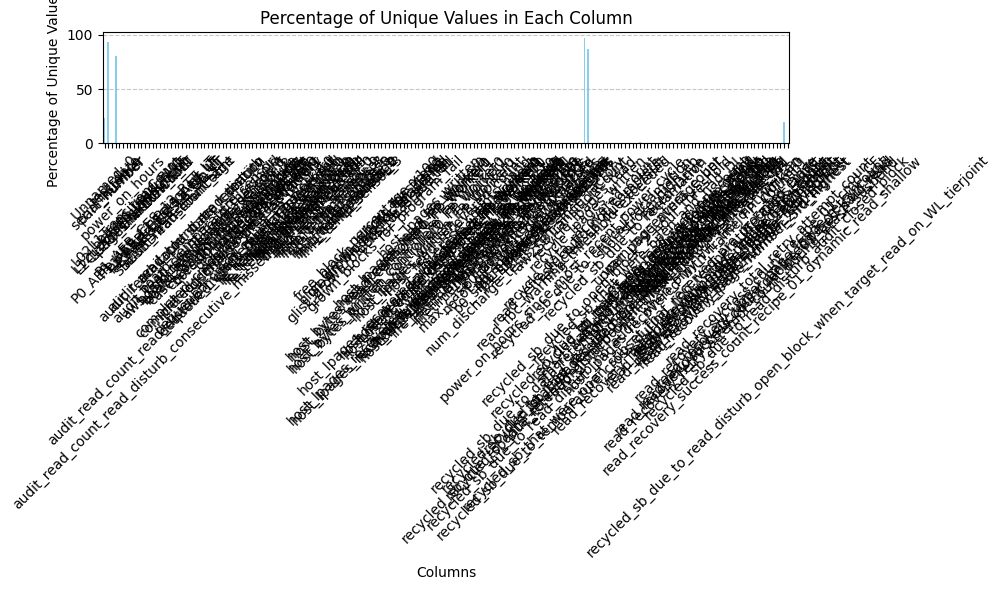

In [5]:
nunique = df_data_with_max_poh.nunique()
nunique.columns=['column','uniquevalues']
nunique.to_csv('data_uniqueness.csv')
nunique
unique_percentages = (df_data_with_max_poh.nunique() / df_data_with_max_poh.shape[0]) * 100
plt.figure(figsize=(10, 6))
unique_percentages.plot(kind='bar', color='skyblue')
plt.title('Percentage of Unique Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Unique Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

EDA

In [6]:
df_data_with_max_poh.describe()

,Unnamed: 0,instance,power_on_hours,L02L1TransitionCount,L12L2CTransitionCount,L2CL2OTransitionCount,Lpages_read_FM0,Lpages_written_FM0,P0_AER_UES_12_Poisoned_LT,P0_LINKDOWN_LT,...,read_recovery_retry_attempt_count_during_erase_suspend,read_recovery_success_count_recipe_01_bes_hard_read,read_recovery_success_count_recipe_01_cmd_CF,read_recovery_success_count_recipe_01_dynamic_read_shallow,read_recovery_success_count_recipe_01_soft_read,read_recovery_total_retry_attempt_count,read_recovery_upper_page_lpage_retry_count,recycled_sb_due_to_read_disturb_audit_closed_block,Column1,recycled_sb_due_to_read_disturb_open_block_when_target_read_on_WL_tierjoint
count,534315.000000,5.343150e+05,5.343150e+05,534315.000000,534315.000000,534315.000000,5.343150e+05,5.343150e+05,534315.000000,534315.000000,...,534315.000000,5.343150e+05,5.343150e+05,534315.000000,5.343150e+05,5.343150e+05,5.343150e+05,534315.000000,534315.000000,534315.000000
mean,36871.593676,1.239449e+05,1.419381e+04,0.000006,0.000006,0.000015,3.557390e+05,1.455227e+13,0.000019,0.000809,...,2.012717,3.286855e+00,1.713751e+02,6.213514,5.450100e+00,2.106431e+02,7.315903e+01,0.129916,10646.690518,1.521683
std,32667.486138,1.112195e+05,6.493467e+06,0.002370,0.002370,0.006417,4.714006e+07,2.225782e+15,0.009674,0.581467,...,681.908892,1.967033e+03,4.106850e+04,1022.974441,3.915836e+03,4.353325e+04,1.740939e+04,14.281082,25389.136853,1112.299587
min,0.000000,3.010000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,5371.000000,3.031200e+04,8.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,32087.000000,8.020000e+04,8.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
75%,58802.500000,3.030820e+05,9.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
max,122827.000000,2.659991e+06,4.046109e+09,1.000000,1.000000,3.000000,8.810820e+09,5.065896e+17,5.000000,425.000000,...,420848.000000,1.428514e+06,1.577769e+07,498172.000000,2.862234e+06,1.722495e+07,5.711648e+06,3411.000000,106727.000000,813056.000000


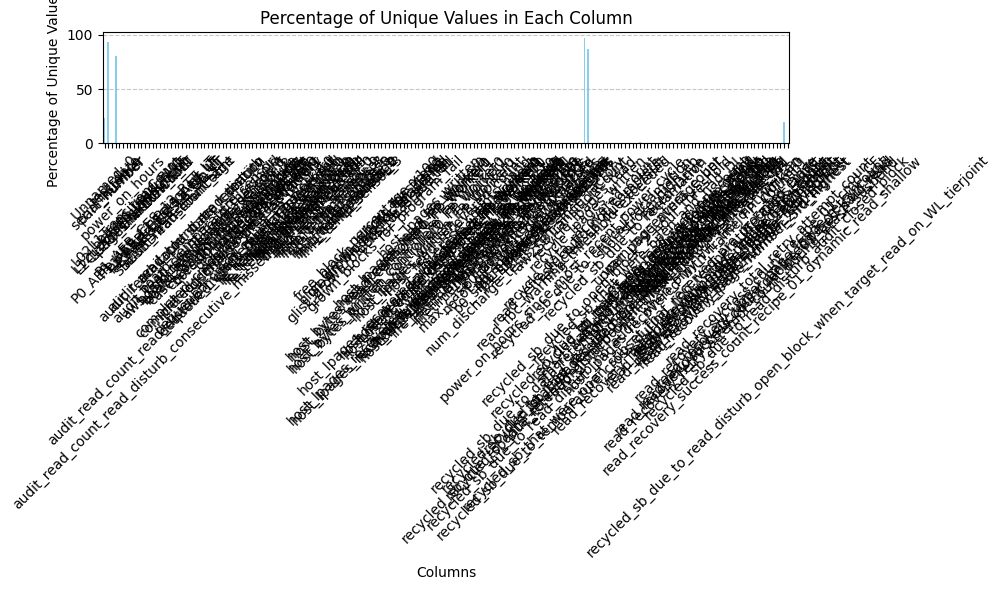

In [7]:
nunique = df_data_with_max_poh.nunique()
nunique.columns=['column','uniquevalues']
unique_percentages = (df_data_with_max_poh.nunique() / df_data_with_max_poh.shape[0]) * 100
plt.figure(figsize=(10, 6))
unique_percentages.plot(kind='bar', color='skyblue')
plt.title('Percentage of Unique Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Unique Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [8]:
file_path = os.path.join(directory, 'features_info.csv')
nunique.to_csv(file_path)

In [9]:
df_data_with_max_poh.shape

(534315, 186)

Limiting to columns listed on Confluence

In [10]:
with pd.option_context('display.float_format', lambda x: '%.2f' % x):
    df_data_with_max_poh_desc = df_data_with_max_poh[['power_on_hours','recycle_data_recovered_count','recycle_lpages_read','recycle_lpages_written','recycled_sb_due_to_fault','recycled_sb_due_to_read_disturb_audit_closed_block','recycled_sb_due_to_read_disturb_no_audit_when_only_WL0_written','recycled_sb_due_to_read_disturb_open_block_audit_on_alternate_WL','recycled_sb_due_to_read_error_recovery_deep_retry','recycled_sb_that_received_pre_program_erase_and_had_DI','recycled_sb_that_were_open_and_had_DI','recycled_sb_that_were_open_subset_that_received_pre_program_erase','recycled_sb_that_were_open_when_recycled','a2f_op_read_recovery_count','host_lpages_recovered_with_frame_FP_Worker0','host_lpages_recovered_with_frame_FP_Worker1','host_lpages_recovered_with_read_retries_FP_Worker0','host_lpages_recovered_with_read_retries_FP_Worker1','host_read_recovered_count','read_recovery_fail_count_recipe_01_proceed_to_FRAME','read_recovery_fm0_sl0_ch0','read_recovery_fm0_sl0_ch1','read_recovery_fm0_sl0_ch2','read_recovery_fm0_sl0_ch3','read_recovery_fm0_sl1_ch0','read_recovery_fm0_sl1_ch1','read_recovery_fm0_sl1_ch2','read_recovery_lower_page_lpage_retry_count','read_recovery_middle_page_lpage_retry_count','read_recovery_pMLC_lpage_retry_count','read_recovery_page_count_1st_highest','read_recovery_page_count_2nd_highest','read_recovery_page_number_1st_highest','read_recovery_page_number_2nd_highest','read_recovery_page_number_3rd_highest','read_recovery_retry_attempt_count_during_erase_suspend','read_recovery_success_count_recipe_01_bes_hard_read','read_recovery_success_count_recipe_01_cmd_CF','read_recovery_success_count_recipe_01_dynamic_read_shallow','read_recovery_success_count_recipe_01_soft_read','read_recovery_total_retry_attempt_count','read_recovery_upper_page_lpage_retry_count','glist_grown_blocks_for_frame','glist_grown_blocks_for_program_fail','grown_blocks_for_erase_fail','grown_blocks_for_frame','grown_blocks_for_program_fail','drive_average_ber','lower_page_average_ber','middle_page_average_ber','upper_page_average_ber','ifs_read_error_counts_nand','p0_smart_error_logs','ifs_erase_counts_nand','read_fbc_warning_threshold_exceeded','smart_warning_composite_temperature_time','case_composite_temperature','max_case_composite_temperature','drive_life_remaining','fe_core_voltage','fe_process','fe_temperature_sensor','life_used_percentage_x100','life_used_percentage_x100_internal','p0_smart_safe_shutdowns','num_discharge_tests_run_since_factory','zq_calibration_issued_to_die_count','pfail']].describe()
    print (df_data_with_max_poh_desc)

       power_on_hours  recycle_data_recovered_count  recycle_lpages_read  \
count       534315.00                     534315.00            534315.00   
mean         14193.81                       4347.81        1959489771.27   
std        6493467.45                    3146179.40        4705634250.42   
min              0.00                          0.00                 0.00   
25%              8.00                          0.00        1182678137.50   
50%              8.00                          0.00        1200444579.00   
75%              9.00                          0.00        1369483910.50   
max     4046108960.00                 2299755520.00      185018559691.00   

       recycle_lpages_written  recycled_sb_due_to_fault  \
count               534315.00                 534315.00   
mean            1897526056.45                  13319.62   
std             4564317964.29                5903158.71   
min                      0.00                      0.00   
25%             1181

In [11]:
f_data = df_data_with_max_poh[['power_on_hours','recycle_data_recovered_count','recycle_lpages_read','recycle_lpages_written','recycled_sb_due_to_fault','recycled_sb_due_to_read_disturb_audit_closed_block','recycled_sb_due_to_read_disturb_no_audit_when_only_WL0_written','recycled_sb_due_to_read_disturb_open_block_audit_on_alternate_WL','recycled_sb_due_to_read_error_recovery_deep_retry','recycled_sb_that_received_pre_program_erase_and_had_DI','recycled_sb_that_were_open_and_had_DI','recycled_sb_that_were_open_subset_that_received_pre_program_erase','recycled_sb_that_were_open_when_recycled','a2f_op_read_recovery_count','host_lpages_recovered_with_frame_FP_Worker0','host_lpages_recovered_with_frame_FP_Worker1','host_lpages_recovered_with_read_retries_FP_Worker0','host_lpages_recovered_with_read_retries_FP_Worker1','host_read_recovered_count','read_recovery_fail_count_recipe_01_proceed_to_FRAME','read_recovery_fm0_sl0_ch0','read_recovery_fm0_sl0_ch1','read_recovery_fm0_sl0_ch2','read_recovery_fm0_sl0_ch3','read_recovery_fm0_sl1_ch0','read_recovery_fm0_sl1_ch1','read_recovery_fm0_sl1_ch2','read_recovery_lower_page_lpage_retry_count','read_recovery_middle_page_lpage_retry_count','read_recovery_pMLC_lpage_retry_count','read_recovery_page_count_1st_highest','read_recovery_page_count_2nd_highest','read_recovery_page_number_1st_highest','read_recovery_page_number_2nd_highest','read_recovery_page_number_3rd_highest','read_recovery_retry_attempt_count_during_erase_suspend','read_recovery_success_count_recipe_01_bes_hard_read','read_recovery_success_count_recipe_01_cmd_CF','read_recovery_success_count_recipe_01_dynamic_read_shallow','read_recovery_success_count_recipe_01_soft_read','read_recovery_total_retry_attempt_count','read_recovery_upper_page_lpage_retry_count','glist_grown_blocks_for_frame','glist_grown_blocks_for_program_fail','grown_blocks_for_erase_fail','grown_blocks_for_frame','grown_blocks_for_program_fail','drive_average_ber','lower_page_average_ber','middle_page_average_ber','upper_page_average_ber','ifs_read_error_counts_nand','p0_smart_error_logs','ifs_erase_counts_nand','read_fbc_warning_threshold_exceeded','smart_warning_composite_temperature_time','case_composite_temperature','max_case_composite_temperature','drive_life_remaining','fe_core_voltage','fe_process','fe_temperature_sensor','life_used_percentage_x100','life_used_percentage_x100_internal','p0_smart_safe_shutdowns','num_discharge_tests_run_since_factory','zq_calibration_issued_to_die_count','pfail']]
file_path = os.path.join(directory, 'f_data.csv')
f_data.to_csv(file_path)
f_data.shape

(534315, 68)

In [12]:
f_data.describe()

,power_on_hours,recycle_data_recovered_count,recycle_lpages_read,recycle_lpages_written,recycled_sb_due_to_fault,recycled_sb_due_to_read_disturb_audit_closed_block,recycled_sb_due_to_read_disturb_no_audit_when_only_WL0_written,recycled_sb_due_to_read_disturb_open_block_audit_on_alternate_WL,recycled_sb_due_to_read_error_recovery_deep_retry,recycled_sb_that_received_pre_program_erase_and_had_DI,...,drive_life_remaining,fe_core_voltage,fe_process,fe_temperature_sensor,life_used_percentage_x100,life_used_percentage_x100_internal,p0_smart_safe_shutdowns,num_discharge_tests_run_since_factory,zq_calibration_issued_to_die_count,pfail
count,5.343150e+05,5.343150e+05,5.343150e+05,5.343150e+05,5.343150e+05,534315.000000,534315.000000,534315.000000,534315.000000,534315.000000,...,534315.000000,534315.000000,534315.000000,534315.000000,5.343150e+05,534315.000000,534315.000000,534315.000000,534315.000000,534315.000000
mean,1.419381e+04,4.347807e+03,1.959490e+09,1.897526e+09,1.331962e+04,0.129916,185.269831,0.063133,0.047942,0.234940,...,99.014785,28.955100,2.490228,64.464677,8.317183e+03,4.438655,1.910931,49.741141,1095.227048,39.248507
std,6.493467e+06,3.146179e+06,4.705634e+09,4.564318e+09,5.903159e+06,14.281082,53.565924,5.506958,3.951076,8.489117,...,0.366804,151.896708,0.620943,340.863757,4.582502e+06,8.818485,9.685992,54.939823,2670.635746,1376.243597
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000e+00,0.000000e+00,1.182678e+09,1.181493e+09,0.000000e+00,0.000000,182.000000,0.000000,0.000000,0.000000,...,99.000000,0.000000,2.000000,61.000000,3.000000e+00,3.000000,0.000000,30.000000,640.000000,22.000000
50%,8.000000e+00,0.000000e+00,1.200445e+09,1.198883e+09,0.000000e+00,0.000000,209.000000,0.000000,0.000000,0.000000,...,99.000000,0.000000,3.000000,62.000000,3.000000e+00,3.000000,0.000000,41.000000,640.000000,38.000000
75%,9.000000e+00,0.000000e+00,1.369484e+09,1.231399e+09,0.000000e+00,0.000000,213.000000,0.000000,0.000000,0.000000,...,99.000000,0.000000,3.000000,63.000000,3.000000e+00,3.000000,0.000000,46.000000,768.000000,39.000000
max,4.046109e+09,2.299756e+09,1.850186e+11,1.849902e+11,3.332773e+09,3411.000000,1198.000000,2304.000000,900.000000,1109.000000,...,100.000000,857.000000,3.000000,65535.000000,3.240100e+09,267.000000,648.000000,1373.000000,62976.000000,580883.000000


power_on_hours                           4.046109e+09
recycle_data_recovered_count             2.299756e+09
recycle_lpages_read                      1.850186e+11
recycle_lpages_written                   1.849902e+11
recycled_sb_due_to_fault                 3.332773e+09
                                             ...     
life_used_percentage_x100_internal       2.670000e+02
p0_smart_safe_shutdowns                  6.480000e+02
num_discharge_tests_run_since_factory    1.373000e+03
zq_calibration_issued_to_die_count       6.297600e+04
pfail                                    5.808830e+05
Length: 68, dtype: float64


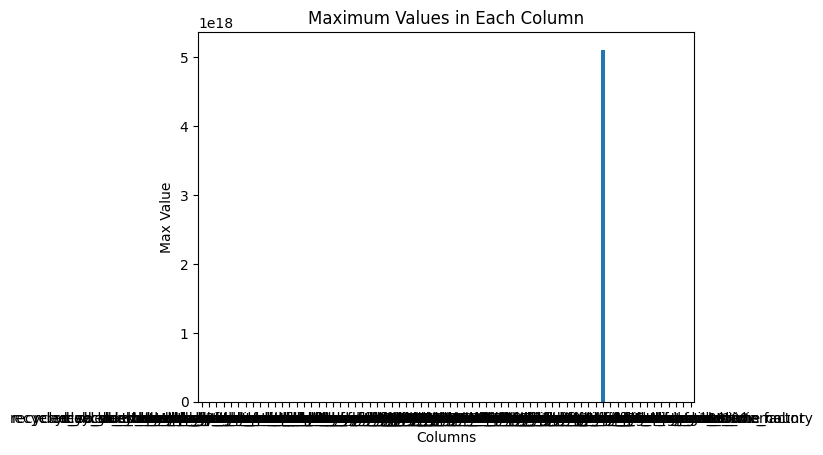

In [13]:
max_values = f_data.max()
print(max_values)
# Plotting
max_values.plot(kind='bar')
plt.title('Maximum Values in Each Column')
plt.ylabel('Max Value')
plt.xlabel('Columns')
plt.xticks(rotation=0)  # Keep the column names horizontal for readability
plt.show()

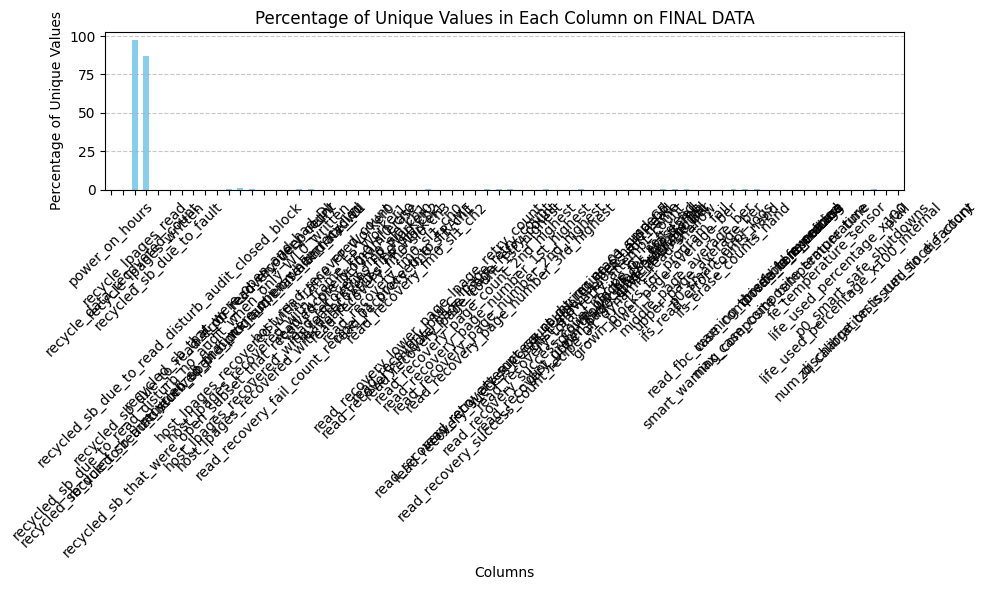

In [14]:
nuniquef_data = f_data.nunique()
nuniquef_data.columns=['column','uniquevalues']
unique_percentages = (f_data.nunique() / f_data.shape[0]) * 100
plt.figure(figsize=(10, 6))
unique_percentages.plot(kind='bar', color='skyblue')
plt.title('Percentage of Unique Values in Each Column on FINAL DATA')
plt.xlabel('Columns')
plt.ylabel('Percentage of Unique Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

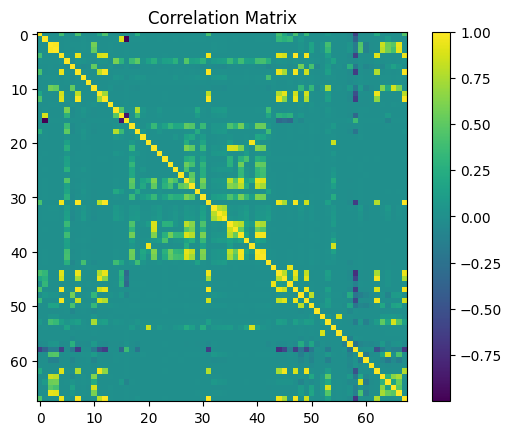

In [15]:
f_data_corr= f_data.corr()
plt.imshow(f_data_corr, cmap='viridis', interpolation='nearest')
plt.colorbar()  
plt.title('Correlation Matrix')
plt.show()

Correlation between features

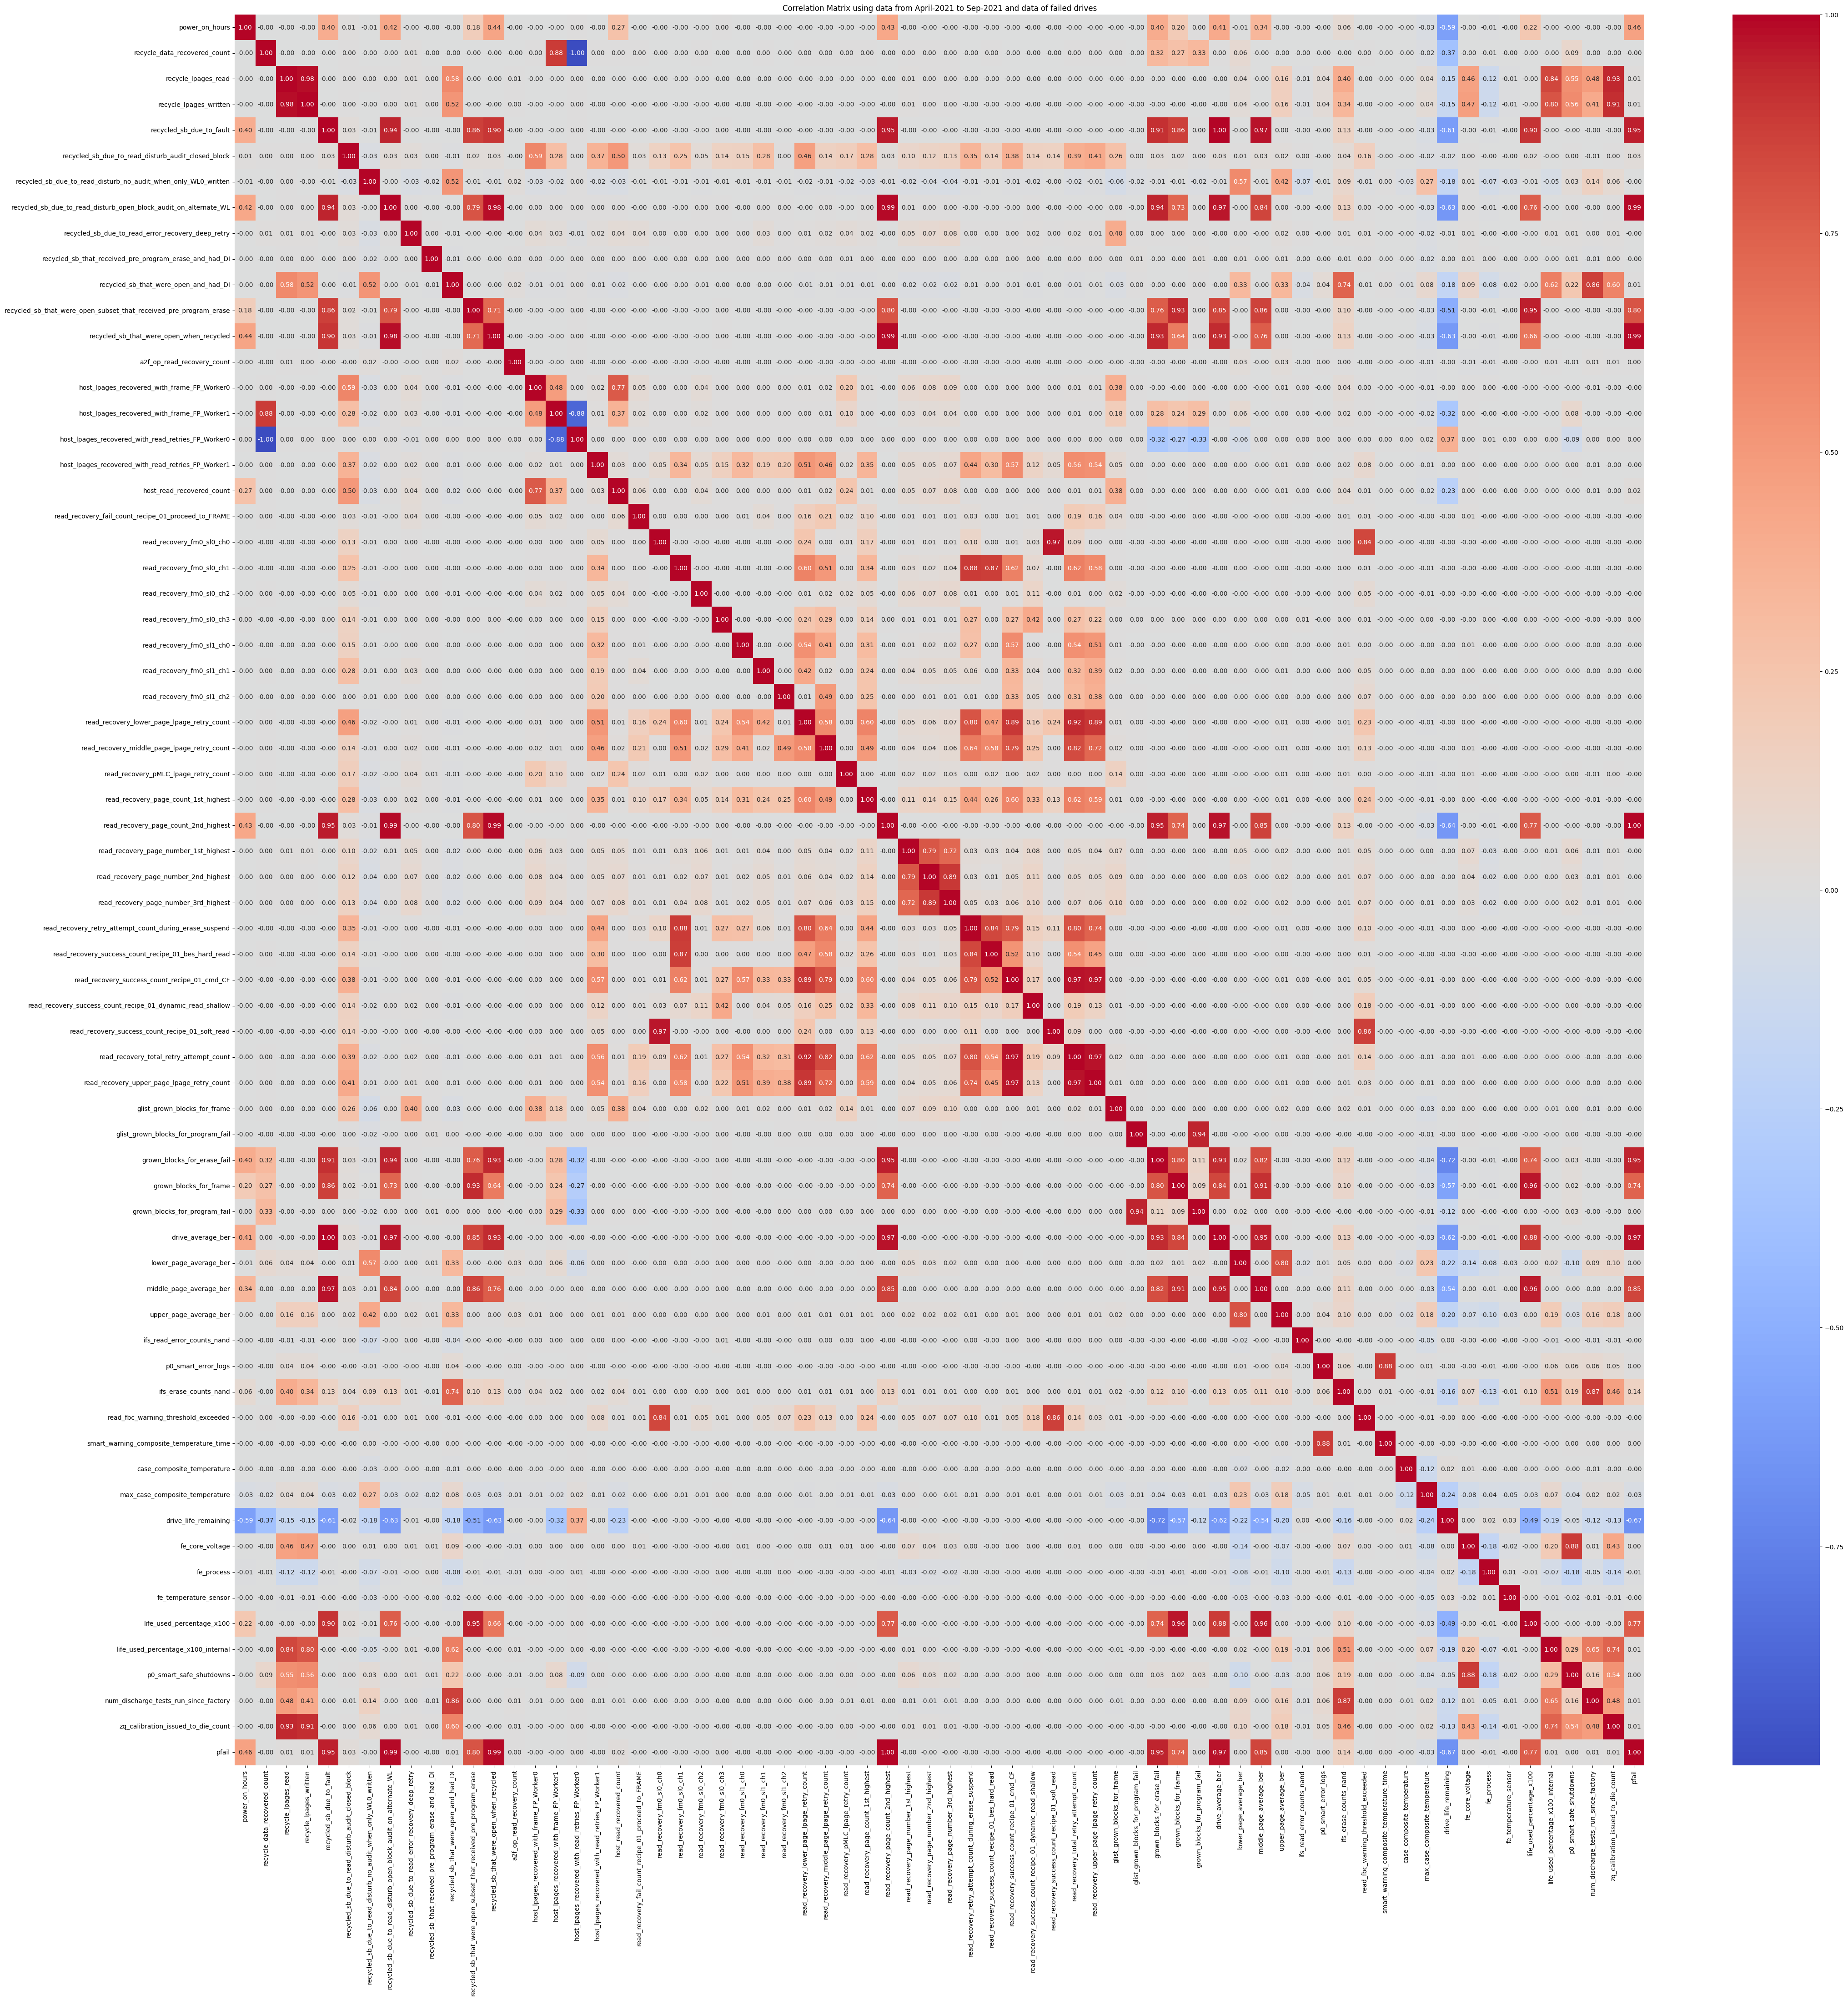

In [16]:
plt.figure(figsize=(50, 50))  
sns.heatmap(f_data_corr, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=f_data_corr.columns,
            yticklabels=f_data_corr.columns)
plt.title('Correlation Matrix using data from April-2021 to Sep-2021 and data of failed drives')
plt.show()

Standard Scaler (Normalization)

In [17]:
standard_scaler = StandardScaler()
standard_scaler_data = standard_scaler.fit_transform(f_data)

# min_max_scaler.fit(f_data)
# standard_scaler_data = min_max_scaler.transform(f_data)
# standard_scaler_data.shape

USING ISOLATION FOREST ALOGRITHM

In [18]:
iso_forest = IsolationForest(n_estimators=69, contamination=0.01, random_state=random_number)
iso_forest.fit(standard_scaler_data)
predictions = iso_forest.predict(standard_scaler_data)

In [19]:
anomalies = standard_scaler_data[predictions == -1]
anomalies.shape

(5343, 68)

In [20]:
predictions_df = pd.DataFrame(predictions, columns=['Predictions'])
print(predictions_df)
df_data_with_max_poh_iso = pd.DataFrame(df_data_with_max_poh)
df_data_with_max_poh_iso['Predictions'] = 0
for index, row in df_data_with_max_poh_iso.iterrows():
    df_data_with_max_poh_iso.at[index, 'Predictions'] = predictions_df.at[index, 'Predictions']

        Predictions
0                 1
1                 1
2                 1
3                 1
4                 1
...             ...
534310            1
534311            1
534312            1
534313            1
534314            1

[534315 rows x 1 columns]


USING K_MEANS ALGORITHM

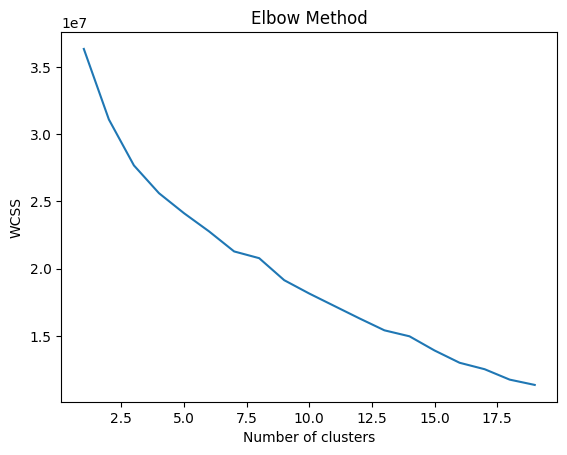

In [21]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=30000, n_init=20, random_state=random_number)
    kmeans.fit(standard_scaler_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


534305 7 3 0
534315


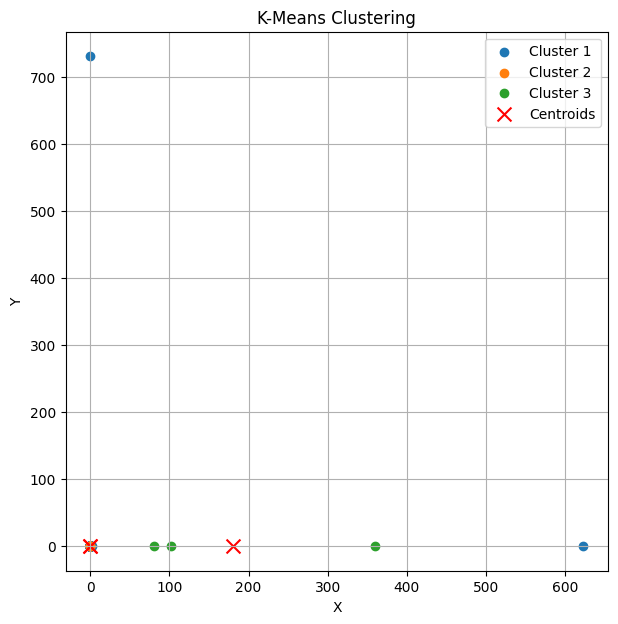

In [22]:
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=53000, n_init=888, random_state=random_number)
kmeans.fit(standard_scaler_data)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
kmeans_cluster_labels = labels
kmeans_labeled_data = [(point, label) for point, label in zip(standard_scaler_data, labels)]
print(len(standard_scaler_data[labels == 0]),len(standard_scaler_data[labels == 1]),len(standard_scaler_data[labels == 2]),len(standard_scaler_data[labels == 3]))
print(len(labels))
[(point, label) for point, label in zip(standard_scaler_data, labels)]
plt.figure(figsize=(7, 7))
for i in range(k):
    cluster_points = standard_scaler_data[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=100, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

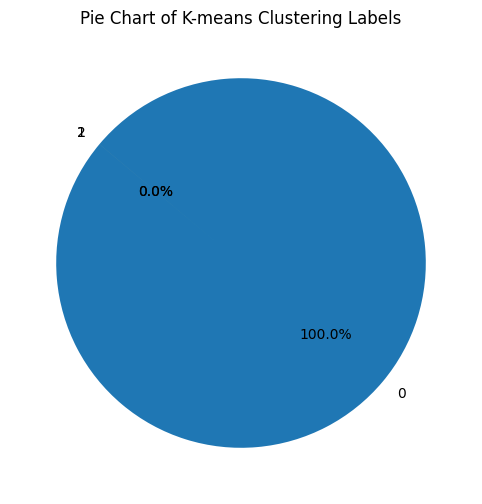

In [23]:
label_counts = np.bincount(labels)
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=np.unique(labels), autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of K-means Clustering Labels')
plt.show()

ISOLATION FOREST WITH HYPERPARAMS

In [24]:
iso_estimators = int(len(standard_scaler_data) * 0.1)
print(iso_estimators)
iso_forest_1 = IsolationForest(n_estimators=iso_estimators, contamination=0.01, random_state=random_number, max_features=1.0, max_samples=1.0)
iso_forest_1.fit_predict(standard_scaler_data)
predictions_1 = iso_forest_1.predict(standard_scaler_data)
anomalies = standard_scaler_data[predictions_1 == -1]
anomalies.shape
predictions_df_1 = pd.DataFrame(predictions_1, columns=['Predictions'])

53431


ISOLATION FOREST ALGORITHM WITH HYPERPARAMETER TUNNING # 2

In [25]:
iso_estimators =  int(len(standard_scaler_data) * 0.01)
print(iso_estimators)
iso_forest_2 = IsolationForest(n_estimators=iso_estimators, contamination=0.01, random_state=random_number, max_features=1.0, max_samples=1.0)
iso_forest_2.fit(standard_scaler_data)
predictions_2 = iso_forest_2.predict(standard_scaler_data)
anomalies = standard_scaler_data[predictions_2 == -1]
anomalies.shape
predictions_df_2 = pd.DataFrame(predictions_2, columns=['Predictions'])

5343


EllipticEnvelope ALGORITHM

In [26]:
ee_model = EllipticEnvelope(support_fraction=1., contamination=0.1)
ee_model.fit(standard_scaler_data)
predictions_ee = ee_model.predict(standard_scaler_data)
print(predictions_ee)
#mahalanobis_distances = ee_model.mahalanobis(standard_scaler_data)
predictions_ee = pd.DataFrame(predictions_ee, columns=['Predictions'])

[-1 -1 -1 ...  1  1  1]


Local Outlier Factor ALGORITHM

In [27]:
lof_neighbors = int(len(standard_scaler_data) * 0.01)
# Initialize the LOF model
lof = LocalOutlierFactor(n_neighbors=lof_neighbors, novelty=False)

# Fit the model and predict outliers
lof_y_pred = lof.fit_predict(standard_scaler_data)

# Find the number of outliers detected
n_outliers = (lof_y_pred == -1).sum()
print(f"Number of outliers detected: {n_outliers}")
predictions_lof = pd.DataFrame(lof_y_pred, columns=['Predictions'])

Number of outliers detected: 39842


ONECLASS SVM ALGORITHM

In [28]:

ocsvm = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)

ocsvm.fit(standard_scaler_data)
pred_oneSVM = ocsvm.predict(standard_scaler_data)

# # Plot the data
# plt.scatter(standard_scaler_data[:, 0], standard_scaler_data[:, 1], c=pred_oneSVM, cmap='coolwarm')
# plt.title("OneClassSVM for Anomaly Detection")
# plt.show()

predictions_oneSVM = pd.DataFrame(pred_oneSVM, columns=['Predictions'])

In [29]:
df_data_with_max_poh_iso = pd.DataFrame(df_data_with_max_poh)
df_data_with_max_poh_iso['Predictions'] = 0
df_data_with_max_poh_iso['iso_forest_1_Predictions'] = 0
df_data_with_max_poh_iso['iso_forest_2_Predictions'] = 0
df_data_with_max_poh_iso['EllipticEnvelope_Predictions'] = 0
df_data_with_max_poh_iso['LOF_Predictions'] = 0
df_data_with_max_poh_iso['ONESVM_Predictions'] = 0
df_data_with_max_poh_iso['CLUSTERS'] = -1
for index, row in df_data_with_max_poh_iso.iterrows():
    df_data_with_max_poh_iso.at[index, 'Predictions'] = predictions_df.at[index, 'Predictions']
    df_data_with_max_poh_iso.at[index, 'iso_forest_1_Predictions'] = predictions_df_1.at[index, 'Predictions']
    df_data_with_max_poh_iso.at[index, 'iso_forest_2_Predictions'] = predictions_df_2.at[index, 'Predictions']
    df_data_with_max_poh_iso.at[index, 'EllipticEnvelope_Predictions'] = predictions_ee.at[index, 'Predictions']
    df_data_with_max_poh_iso.at[index, 'LOF_Predictions'] = predictions_lof.at[index, 'Predictions']
    df_data_with_max_poh_iso.at[index, 'ONESVM_Predictions'] = predictions_oneSVM.at[index, 'Predictions']
    df_data_with_max_poh_iso.at[index, 'CLUSTERS'] = kmeans_cluster_labels[index]

file_path = os.path.join(directory, f'all_predictions_{formatted_now}.csv')
df_data_with_max_poh_iso.to_csv(file_path)


In [30]:
print(f'all_predictions_{formatted_now}.csv')

all_predictions_2024_04_10_19_48_58.csv


In [31]:
print(directory)

IncludingFailed_Dirves_Normalization_2024_04_10_19_48_58_233
